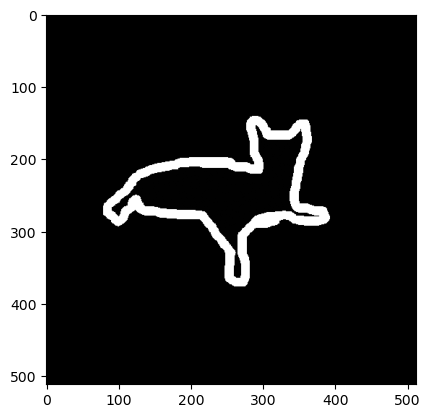

[  0   1 255]


In [74]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.io import read_image
from torchvision.transforms import ToPILImage
import torch
img = Image.open("tmp/label/Abyssinian_1.png")
plt.imshow(img, cmap='gray')
plt.show()

width, height = img.size
pixels = img.load()

colors = [[pixels[w,h] for w in range(width)] for h in range(height)]

print(np.unique(colors))

# img = read_image("TrainVal/label/american_bulldog_10.png")
# print(torch.unique(img))
# img = ToPILImage()(img)
# pixels = img.load()

# colors = [[pixels[w,h] for w in range(width)] for h in range(height)]
# print(np.unique(colors))
# plt.imshow(img)
# plt.show()

# nimg = np.array(img)
# print(nimg)
# np.savetxt("test.txt", nimg, fmt='%.1f')

In [ ]:
from PIL import Image

image = "Abyssinian_1.jpg"
train = "TrainVal/color/"
target = "tmp/"

base_width = 512
img = Image.open(train+image)
wpercent = (base_width / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((base_width, hsize), Image.Resampling.LANCZOS)
img.save(target+image)

: 

In [92]:
import os
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set the paths for the source and target directories
train_dir = "Test/color/"
target_dir = "rtest/color"
target_size = 512

# Create the target directory if it doesn't exist
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Retrieve list of image files with supported extensions
image_files = [f for f in os.listdir(train_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

# Loop over all image files with a progress bar
for image_file in tqdm(image_files, desc="Processing images"):
    img_path = os.path.join(train_dir, image_file)
    img = Image.open(img_path)
    width, height = img.size

    # Calculate the new dimensions while maintaining aspect ratio
    if width > height:
        new_width = target_size
        new_height = int(height * (target_size / width))
    else:
        new_height = target_size
        new_width = int(width * (target_size / height))

    # Resize the image using high-quality resampling
    resized_img = img.resize((new_width, new_height), Image.Resampling.LANCZOS)

    # Create a new blank image with a black background
    new_img = Image.new("RGB", (target_size, target_size), (0, 0, 0))
    
    # Calculate the position to paste the resized image
    paste_x = (target_size - new_width) // 2
    paste_y = (target_size - new_height) // 2

    # Paste the resized image onto the blank canvas
    new_img.paste(resized_img, (paste_x, paste_y))

    # Save the final image
    new_img.save(os.path.join(target_dir, image_file))

Processing images: 100%|██████████| 3694/3694 [01:10<00:00, 52.52it/s]


In [93]:
import os
from PIL import Image
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

# Set the paths for the source and target directories
train_dir = "Test/label/"
target_dir = "rtest/label"
target_size = 512

# Create the target directory if it doesn't exist
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Retrieve list of image files with supported extensions
image_files = [f for f in os.listdir(train_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

# Loop over all image files with a progress bar
for image_file in tqdm(image_files, desc="Processing images"):
    img_path = os.path.join(train_dir, image_file)
    
    # Open the image and convert to numpy array to ensure we can control the values
    img = Image.open(img_path)
    img_array = np.array(img)
    
    # Verify we have the expected values
    unique_values = np.unique(img_array)
    # print(f"Image {image_file} has unique values: {unique_values}")
    
    # Get dimensions
    height, width = img_array.shape[:2]
    
    # Calculate the new dimensions while maintaining aspect ratio
    if width > height:
        new_width = target_size
        new_height = int(height * (target_size / width))
    else:
        new_height = target_size
        new_width = int(width * (target_size / height))
    
    # Create a new blank array with zeros (black background)
    new_array = np.zeros((target_size, target_size), dtype=np.uint8)
    
    # Resize the original image using PIL with NEAREST resampling
    # This preserves the exact pixel values
    resized_img = img.resize((new_width, new_height), Image.Resampling.NEAREST)
    resized_array = np.array(resized_img)
    
    # Calculate the position to paste the resized image
    paste_y = (target_size - new_height) // 2
    paste_x = (target_size - new_width) // 2
    
    # Paste the resized image into the new array
    new_array[paste_y:paste_y+new_height, paste_x:paste_x+new_width] = resized_array
    
    # Verify the final array has only the expected values
    final_unique_values = np.unique(new_array)
    # print(f"Final image has unique values: {final_unique_values}")
    
    # Convert back to PIL Image and save
    new_img = Image.fromarray(new_array)
    new_img.save(os.path.join(target_dir, image_file))

Processing images: 100%|██████████| 3694/3694 [01:07<00:00, 55.05it/s]


In [ ]:
import os
import re

# Set the folder path containing the images (update this with your folder path)
folder_path = 'tmp/color'

# Compile the regex pattern:
# This matches file names ending with an underscore, one or more digits, and ".jpg".
pattern = re.compile(r'^.*_\d+\.jpg$', re.IGNORECASE)

# List to collect files that do NOT match the naming convention
non_matching_files = []

# Loop over all files in the specified folder
for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    # Ensure we only check files
    if os.path.isfile(file_path):
        if not pattern.match(file):
            non_matching_files.append(file)

print("Files that do not follow the naming convention '<name>_<number>.jpg':")
print(non_matching_files)



Files that do not follow the naming convention '<name>_<number>.jpg':
[]


: 

In [ ]:
import os
import shutil

def move_jpg_files(source_folder, destination_folder):
    """
    Moves all JPG files from the source folder to the destination folder.

    Args:
        source_folder (str): The path to the source folder.
        destination_folder (str): The path to the destination folder.
    """

    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Iterate through all files in the source folder
    for filename in os.listdir(source_folder):
        # Check if the file ends with .jpg (case-insensitive)
        if filename.lower().endswith(".jpg"):
            # Create the full paths for the source and destination files
            source_path = os.path.join(source_folder, filename)
            destination_path = os.path.join(destination_folder, filename)

            try:
                # Move the file
                shutil.move(source_path, destination_path)
                print(f"Moved '{filename}' from '{source_folder}' to '{destination_folder}'")
            except Exception as e:
                print(f"Error moving '{filename}': {e}")

# Example usage (replace with your actual folder paths)
source_folder = "tmp"  # Replace with your source folder path
destination_folder = "tmp/color"  # Replace with your destination folder path

move_jpg_files(source_folder, destination_folder)

: 

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

class down(nn.Module):
    def __init__(self, din, dout):
        super().__init__()
        self.down = nn.Sequential(
            nn.Conv2d(din, dout, kernel_size=3, padding=1),
            nn.BatchNorm2d(dout),
            nn.ReLU(),
            nn.Conv2d(dout, dout, kernel_size=3, padding=1),
            nn.BatchNorm2d(dout),
            nn.ReLU(),
        )
    
    def forward(self, x):
        return self.down(x)
    
class up(nn.Module):
    def __init__(self, din, dout):
        super().__init__()
        self.up = nn.Sequential(
            nn.Conv2d(din, dout, kernel_size=3, padding=1),
            nn.BatchNorm2d(dout),
            nn.ReLU(),
            nn.Conv2d(dout, dout, kernel_size=3, padding=1),
            nn.BatchNorm2d(dout),
            nn.ReLU(),
        )

    def forward(self, x):
        return self.up(x)

class unet(nn.Module):
    def __init__(self):
        super().__init__()
        self.scale = 3 # maybe using the original channels might be better
        self.flatten = nn.Flatten()
        self.down1 = down(3, self.scale * 64)
        self.down2 = down(self.scale * 64, self.scale * 128)
        self.down3 = down(self.scale * 128, self.scale * 256)
        self.down4 = down(self.scale * 256, self.scale * 512)
        self.down5 = down(self.scale * 512, self.scale * 1024)
        self.up1 = up(self.scale * 1024, self.scale * 512)
        self.up2 = up(self.scale * 512, self.scale * 256)
        self.up3 = up(self.scale * 256, self.scale * 128)
        self.up4 = up(self.scale * 128, self.scale * 64)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.upsample = nn.Upsample(scale_factor=2)
        self.upconv1 = nn.Conv2d(self.scale * 1024, self.scale * 512, kernel_size=3, padding=1)
        self.upconv2 = nn.Conv2d(self.scale * 512, self.scale * 256, kernel_size=3, padding=1)
        self.upconv3 = nn.Conv2d(self.scale * 256, self.scale * 128, kernel_size=3, padding=1)
        self.upconv4 = nn.Conv2d(self.scale * 128, self.scale * 64, kernel_size=3, padding=1)
        self.output = nn.Sequential(
            nn.Conv2d(self.scale * 64, 4, kernel_size=1),
            # nn.Softmax(dim=1)
        )

    def forward(self, x):
        x1 = self.down1(x)
        x2 = self.down2(self.maxpool(x1))
        x3 = self.down3(self.maxpool(x2))
        x4 = self.down4(self.maxpool(x3))
        x5 = self.down5(self.maxpool(x4))
        x6 = self.up1(torch.cat([x4, self.upconv1(self.upsample(x5))], dim=1))
        x7 = self.up2(torch.cat([x3, self.upconv2(self.upsample(x6))], dim=1))
        x8 = self.up3(torch.cat([x2, self.upconv3(self.upsample(x7))], dim=1))
        x9 = self.up4(torch.cat([x1, self.upconv4(self.upsample(x8))], dim=1))
        pre_output = self.output(x9)
        return torch.argmax(pre_output, dim=1)



In [3]:
# img = Image.open("tmp/color/Abyssinian_1.jpg")
# t = transforms.ToTensor()(img)
# t = t.unsqueeze(0)

# print(t.size())

model = unet()

with torch.no_grad():  # Disable gradient calculation for inference
    model.eval() # Set the model to evaluation mode
    res = model(t)
    print("Output tensor shape:", res.shape)
    print("Output tensor:\n",res)

NameError: name 't' is not defined

Feature batch shape: torch.Size([64, 3, 512, 512])
Labels batch shape: torch.Size([64, 1, 512, 512])
tensor([0, 2, 3], dtype=torch.uint8)


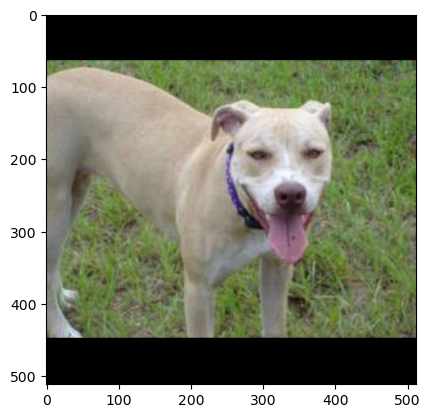

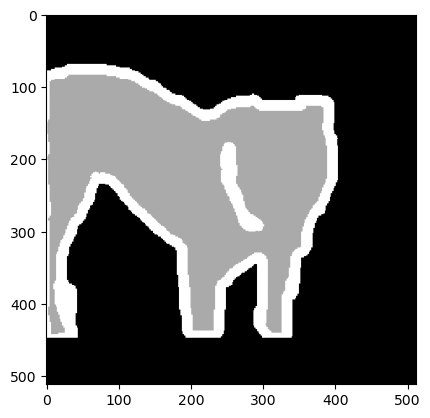

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, PILToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


import os
from torchvision.io import read_image

class dataset(Dataset):
    def __init__(self, img_dir, label_dir, transform=None, target_transform=None):
        self.img_dir = img_dir
        self.label_dir = label_dir
        self.img_names = sorted([os.path.splitext(filename)[0] for filename in os.listdir(img_dir)])
        self.len = len(self.img_names)
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return self.len
    
    def __getitem__(self, idx):
        img = read_image(os.path.join(self.img_dir, self.img_names[idx] + ".jpg"))
        label = read_image(os.path.join(self.label_dir, self.img_names[idx] + ".png"))

        if self.transform:
            img = self.transform(img)

        if self.target_transform:
            label = self.target_transform(label)

        return img, label
    
def display_img_label(data, idx):
    img, label = data[idx]
    figure = plt.figure(figsize=(10,20))
    figure.add_subplot(1, 2, 1)
    plt.imshow(img.permute(1, 2, 0))

    figure.add_subplot(1, 2, 2)
    plt.imshow(label.permute(1, 2, 0), cmap='grey')

    plt.show()

class target_remap(object):
    def __call__(self, img):
        img[img == 255] = 3
        return img


training_data = dataset("rtrain/color", "rtrain/label", target_transform=target_remap())

test_data = dataset("rtest/color", "rtest/label", target_transform=target_remap())

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# train_features, train_labels = next(iter(train_dataloader))
# print(f"Feature batch shape: {train_features.size()}")
# print(f"Labels batch shape: {train_labels.size()}")
# img = train_features[0].permute(1, 2, 0)
# label = train_labels[0].permute(1, 2, 0)
# print(torch.unique(label))
# plt.imshow(img)
# plt.show()

# plt.imshow(label, cmap='grey')
# plt.show()

In [ ]:
sorted(os.listdir("tmp/color/"))

['Abyssinian_1.jpg',
 'Abyssinian_10.jpg',
 'Abyssinian_100.jpg',
 'Abyssinian_101.jpg',
 'Abyssinian_102.jpg',
 'Abyssinian_103.jpg',
 'Abyssinian_104.jpg',
 'Abyssinian_105.jpg',
 'Abyssinian_106.jpg',
 'Abyssinian_107.jpg',
 'Abyssinian_108.jpg',
 'Abyssinian_109.jpg',
 'Abyssinian_11.jpg',
 'Abyssinian_110.jpg',
 'Abyssinian_111.jpg',
 'Abyssinian_112.jpg',
 'Abyssinian_113.jpg',
 'Abyssinian_114.jpg',
 'Abyssinian_115.jpg',
 'Abyssinian_116.jpg',
 'Abyssinian_117.jpg',
 'Abyssinian_118.jpg',
 'Abyssinian_119.jpg',
 'Abyssinian_12.jpg',
 'Abyssinian_120.jpg',
 'Abyssinian_121.jpg',
 'Abyssinian_122.jpg',
 'Abyssinian_123.jpg',
 'Abyssinian_124.jpg',
 'Abyssinian_125.jpg',
 'Abyssinian_126.jpg',
 'Abyssinian_127.jpg',
 'Abyssinian_128.jpg',
 'Abyssinian_129.jpg',
 'Abyssinian_13.jpg',
 'Abyssinian_130.jpg',
 'Abyssinian_131.jpg',
 'Abyssinian_132.jpg',
 'Abyssinian_133.jpg',
 'Abyssinian_134.jpg',
 'Abyssinian_135.jpg',
 'Abyssinian_136.jpg',
 'Abyssinian_137.jpg',
 'Abyssinian_138.

: 

In [12]:
loss = nn.CrossEntropyLoss()
input = torch.randn(1,4,512, 512, requires_grad=True)
target = torch.empty(1,512, 512, dtype=torch.long).random_(3)
print(input.size())
print(target.size())
output = loss(input, target)
print(output)


torch.Size([1, 4, 512, 512])
torch.Size([1, 512, 512])
tensor(1.7241, grad_fn=<NllLoss2DBackward0>)


In [ ]:
target[0,1] = 255

print(output)

IndexError: Target 255 is out of bounds.

: 

In [ ]:
a = torch.log(torch.exp(input[0,0,0])/torch.sum(torch.exp(input[0,:,0])))
b = torch.log(torch.exp(input[0,1,1])/torch.sum(torch.exp(input[0,:,1])))
c = torch.log(torch.exp(input[0,0,2])/torch.sum(torch.exp(input[0,:,2])))
d = torch.log(torch.exp(input[0,0,3])/torch.sum(torch.exp(input[0,:,3])))
e = torch.log(torch.exp(input[0,1,4])/torch.sum(torch.exp(input[0,:,4])))
(a+b+c+d+e)/5

tensor(-1.5773, grad_fn=<DivBackward0>)

: 

: 